# Вариант 21 

- Найти среднее и дисперсию каждого столбца.
- Визуализировать датасет любым удобным способом. Можно несколькими графиками.
- Построить графики для каждой пары признаков в наборе данных.
- Построить гистограмму каждого из признаков.
- Найти выбросы. Удалить их.
     Если номер варианта четный - удалить всю строку данных из выборки.
     Если номер варианта не четный - присвоить выбросам среднее значение.
- Найти новые средние и дисперсии, сравнить со старыми.
- Нормализовать данные по среднему и дисперсии.

In [1]:
###
import pandas as pd
from statistics import variance
import matplotlib.pyplot as plt
data=pd.read_json('var21.jsn')
data.head()

,fubjw,pwjpx,yxgod
0,14.072189,13.308406,11.172298
1,2.888551,17.928929,11.006944
2,17.553002,10.428096,10.205059
3,-0.153004,7.369249,7.494744
4,0.885772,9.728196,16.310529


In [2]:
#Найти среднее и дисперсию каждого столбца
v1=variance(data['fubjw'])
sr1=data['fubjw'].mean()
print('Столбец fubjw:',v1,sr1)
v2=variance(data['pwjpx'])
sr2=data['pwjpx'].mean()
print('Столбец pwjpx:',v2,sr2)
v3=variance(data['yxgod'])
sr3=data['yxgod'].mean()
print('Столбец yxgod:',v3,sr3)

Столбец fubjw: 401.15466283176556 9.685063987676227
Столбец pwjpx: 21.18158221336773 12.217775258309297
Столбец yxgod: 906.2264287891862 14.485331941195948


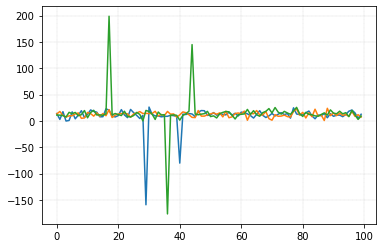

In [3]:
#Визуализировать датасет любым удобным способом.
plt.plot(data['fubjw'])
plt.plot(data['pwjpx'])
plt.plot(data['yxgod'])
plt.grid(ls = '--', lw = 0.25)

In [4]:
#Построить графики для каждой пары признаков в наборе данных.
####создадим какие-то признаки

data['new_col_fu']=(data['fubjw']>1).astype('int64')
data['new_col_pw']=(data['pwjpx']>10).astype('int64')
data['new_col_yx']=(data['yxgod']>10).astype('int64')
data.head()

,fubjw,pwjpx,yxgod,new_col_fu,new_col_pw,new_col_yx
0,14.072189,13.308406,11.172298,1,1,1
1,2.888551,17.928929,11.006944,1,1,1
2,17.553002,10.428096,10.205059,1,1,1
3,-0.153004,7.369249,7.494744,0,0,0
4,0.885772,9.728196,16.310529,0,0,1


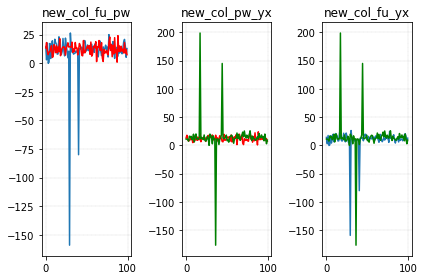

In [5]:
#графикu
fig,axs = plt.subplots(1, 3)
axs[0].plot(data['fubjw'])
axs[0].plot(data['pwjpx'], 'r')
axs[0].grid(ls = '--', lw = 0.25)
axs[0].set_title('new_col_fu_pw')
axs[1].grid(ls = '--', lw = 0.25)
axs[1].set_title('new_col_pw_yx')
axs[1].plot(data['pwjpx'], 'r')
axs[1].plot(data['yxgod'],'g')
axs[2].plot(data['fubjw'])
axs[2].plot(data['yxgod'], 'g')
axs[2].grid(ls = '--', lw = 0.25)
axs[2].set_title('new_col_fu_yx')
fig.tight_layout()
plt.show()

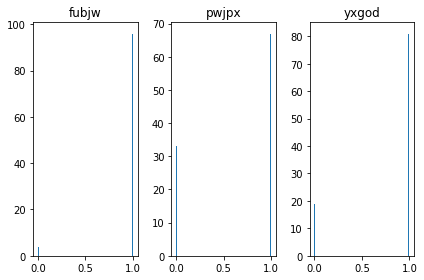

In [6]:
#Построить гистограмму каждого из признаков.
fig,axs = plt.subplots(1, 3)
axs[0].hist(data['new_col_fu'],data['new_col_fu'].count())
axs[0].set_title('fubjw')
axs[1].hist(data['new_col_pw'],data['new_col_pw'].count())
axs[1].set_title('pwjpx')
axs[2].hist(data['new_col_yx'],data['new_col_yx'].count())
axs[2].set_title('yxgod')
fig.tight_layout()

In [7]:
###Найти выбросы. Удалить их.
#####Если номер варианта не четный - присвоить выбросам среднее значение.
data.head()

,fubjw,pwjpx,yxgod,new_col_fu,new_col_pw,new_col_yx
0,14.072189,13.308406,11.172298,1,1,1
1,2.888551,17.928929,11.006944,1,1,1
2,17.553002,10.428096,10.205059,1,1,1
3,-0.153004,7.369249,7.494744,0,0,0
4,0.885772,9.728196,16.310529,0,0,1


9.685063987676227 12.217775258309297 14.485331941195948
0     14.072189
1      2.888551
2     17.553002
3     -0.153004
4      0.885772
        ...    
95    18.465467
96    20.724310
97    15.211425
98     5.098854
99    12.713790
Name: fubjw, Length: 100, dtype: float64


<AxesSubplot:>

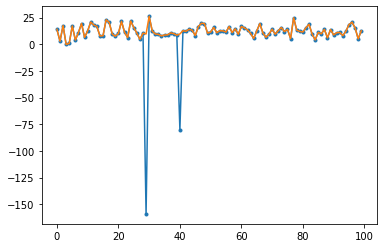

In [22]:
print(sr1,sr2,sr3)
plt.plot(data['fubjw'],'.-')
# значения, в 3 раза отличающиеся от средних это выброс
jw = data['fubjw'].apply(lambda x: sr1 if abs(x) > sr1*3 else x)
print(jw)
jw.plot()

<AxesSubplot:>

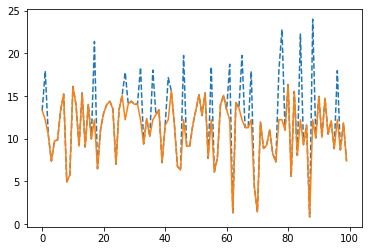

In [23]:
plt.plot(data['pwjpx'],'--')
# значения, на 4.9 отличающиеся от средних это выброс
px = data['pwjpx'].apply(lambda x: sr2 if abs(x) > sr2+4.9 else x)
px.plot()

<AxesSubplot:>

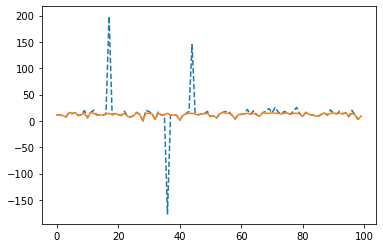

In [24]:
plt.plot(data['yxgod'],'--')
# значения, на 2 отличающиеся от средних это выброс
od = data['yxgod'].apply(lambda x: sr3 if abs(x) > sr3+2 else x)
od.plot()

In [30]:
#Найти новые средние и дисперсии, сравнить со старыми.
news1=jw.mean()
news2=px.mean()
news3=od.mean()
print(news1-sr1,news2-sr2,news3-sr3)

newv1=variance(jw)
newv2=variance(px)
newv3=variance(od)
print(newv1-v1,newv2-v2,newv3-v3)

2.5840577265264493 -1.1469643253492166 -2.3780518941860986
-375.5410058068617 -10.295769488327995 -895.3485092641889


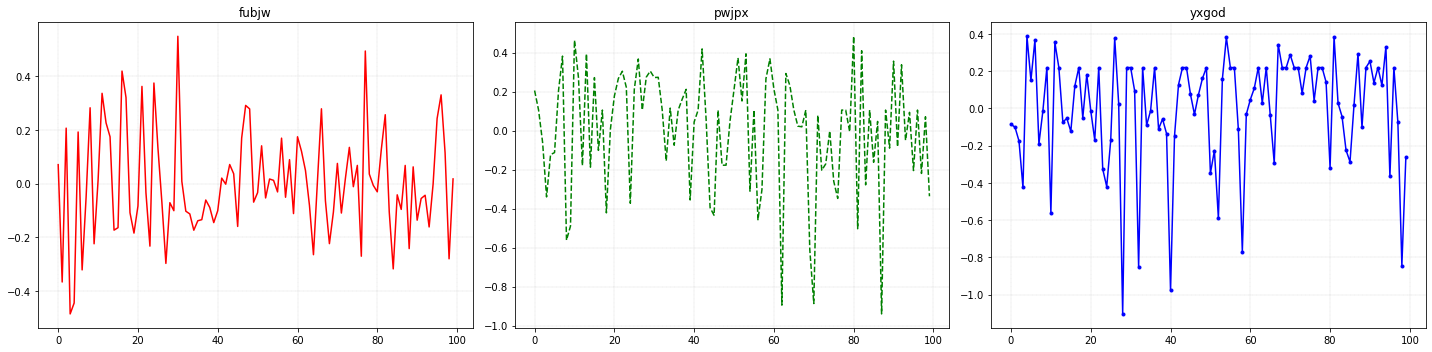

In [39]:
#Нормализовать данные по среднему и дисперсии.
fig, axs = plt.subplots(1,3,figsize=(20,5))
axs[0].plot(jw.apply(lambda x: (x - news1)/newv1),'r')
axs[0].set_title('fubjw')
axs[0].grid(ls = '--', lw = 0.25)
axs[1].plot(px.apply(lambda x: (x - news2)/newv2),'g--')
axs[1].set_title('pwjpx')
axs[1].grid(ls = '--', lw = 0.25)
axs[2].plot(od.apply(lambda x: (x - news3)/newv3),'b.-')
axs[2].set_title('yxgod')
axs[2].grid(ls = '--', lw = 0.25)
fig.tight_layout()
plt.show()